<a href="https://colab.research.google.com/github/Fridge2000/ai-accelerator-2025/blob/main/Medicine_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
import zipfile
import os
import pandas as pd

In [ ]:
auth.authenticate_user()

!gcloud config set project medication-predictor

!gsutil cp gs://medication-dataset/disease_symptom_prediction_dataset.zip /content/

Are you sure you wish to set property [core/project] to medication-predictor?

Do you want to continue (Y/n)?  Y

Updated property [core/project].
Copying gs://medication-dataset/disease_symptom_prediction_dataset.zip...
/ [1 files][ 30.0 KiB/ 30.0 KiB]                                                
Operation completed over 1 objects/30.0 KiB.                                     


In [ ]:
!ls -lh /content/

total 36K
-rw-r--r-- 1 root root  31K Mar 29 15:32 disease_symptom_prediction_dataset.zip
drwxr-xr-x 1 root root 4.0K Mar 24 13:34 sample_data


In [ ]:
zip_path = "/content/disease_symptom_prediction_dataset.zip"
extract_to = "/content/data/"

# Create directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete! Files are in:", extract_to)
!ls -lh /content/data

Extraction complete! Files are in: /content/data/
total 640K
-rw-r--r-- 1 root root 618K Mar 29 15:34 dataset.csv
-rw-r--r-- 1 root root  11K Mar 29 15:34 symptom_Description.csv
-rw-r--r-- 1 root root 3.5K Mar 29 15:34 symptom_precaution.csv
-rw-r--r-- 1 root root 2.3K Mar 29 15:34 Symptom-severity.csv


In [ ]:
dataset_df = pd.read_csv("/content/data/dataset.csv")
symptom_Description_df = pd.read_csv("/content/data/symptom_Description.csv")
symptom_precaution_df = pd.read_csv("/content/data/symptom_precaution.csv")
Symptom_severity_df = pd.read_csv("/content/data/Symptom-severity.csv")

In [ ]:
print(dataset_df.head())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

In [ ]:
print(len(dataset_df["Disease"].unique())) # Number of unique values in the target column

41


In [ ]:
print("Symptom 1 Unique Symptoms: " + str(len(dataset_df["Symptom_1"].unique())))
print("Symptom 2 Unique Symptoms: " + str(len(dataset_df["Symptom_2"].unique())))
print("Symptom 3 Unique Symptoms: " + str(len(dataset_df["Symptom_3"].unique())))
print("Symptom 4 Unique Symptoms: " + str(len(dataset_df["Symptom_4"].unique())))
print("Symptom 5 Unique Symptoms: " + str(len(dataset_df["Symptom_5"].unique())))
print("Symptom 6 Unique Symptoms: " + str(len(dataset_df["Symptom_6"].unique())))
print("Symptom 7 Unique Symptoms: " + str(len(dataset_df["Symptom_7"].unique())))
print("Symptom 8 Unique Symptoms: " + str(len(dataset_df["Symptom_8"].unique())))
print("Symptom 9 Unique Symptoms: " + str(len(dataset_df["Symptom_9"].unique())))
print("Symptom 10 Unique Symptoms: " + str(len(dataset_df["Symptom_10"].unique())))
print("Symptom 11 Unique Symptoms: " + str(len(dataset_df["Symptom_11"].unique())))
print("Symptom 12 Unique Symptoms: " + str(len(dataset_df["Symptom_12"].unique())))
print("Symptom 13 Unique Symptoms: " + str(len(dataset_df["Symptom_13"].unique())))
print("Symptom 14 Unique Symptoms: " + str(len(dataset_df["Symptom_14"].unique())))
print("Symptom 15 Unique Symptoms: " + str(len(dataset_df["Symptom_15"].unique())))
print("Symptom 16 Unique Symptoms: " + str(len(dataset_df["Symptom_16"].unique())))
print("Symptom 17 Unique Symptoms: " + str(len(dataset_df["Symptom_17"].unique())))

Symptom 1 Unique Symptoms: 34
Symptom 2 Unique Symptoms: 48
Symptom 3 Unique Symptoms: 54
Symptom 4 Unique Symptoms: 51
Symptom 5 Unique Symptoms: 39
Symptom 6 Unique Symptoms: 33
Symptom 7 Unique Symptoms: 27
Symptom 8 Unique Symptoms: 22
Symptom 9 Unique Symptoms: 23
Symptom 10 Unique Symptoms: 22
Symptom 11 Unique Symptoms: 19
Symptom 12 Unique Symptoms: 12
Symptom 13 Unique Symptoms: 9
Symptom 14 Unique Symptoms: 5
Symptom 15 Unique Symptoms: 4
Symptom 16 Unique Symptoms: 4
Symptom 17 Unique Symptoms: 2


In [ ]:
my_list = list(set(list(dataset_df["Symptom_1"].dropna().unique()) + list(dataset_df["Symptom_2"].dropna().unique()) + list(dataset_df["Symptom_3"].dropna().unique()) + list(dataset_df["Symptom_4"].dropna().unique()) + list(dataset_df["Symptom_5"].dropna().unique()) + list(dataset_df["Symptom_6"].dropna().unique()) + list(dataset_df["Symptom_7"].dropna().unique()) + list(dataset_df["Symptom_8"].dropna().unique()) + list(dataset_df["Symptom_9"].dropna().unique()) + list(dataset_df["Symptom_10"].dropna().unique()) + list(dataset_df["Symptom_11"].dropna().unique()) + list(dataset_df["Symptom_12"].dropna().unique()) + list(dataset_df["Symptom_13"].dropna().unique()) + list(dataset_df["Symptom_14"].dropna().unique()) + list(dataset_df["Symptom_15"].dropna().unique()) + list(dataset_df["Symptom_16"].dropna().unique()) + list(dataset_df["Symptom_17"].dropna().unique())))

print(my_list)
print(len(my_list))
print(len(dataset_df["Disease"]))

[' anxiety', ' ulcers_on_tongue', ' pain_during_bowel_movements', ' continuous_sneezing', ' headache', ' swollen_legs', ' sweating', ' mucoid_sputum', ' internal_itching', ' breathlessness', ' fast_heart_rate', ' coma', ' muscle_weakness', ' patches_in_throat', ' mood_swings', ' nodal_skin_eruptions', ' toxic_look_(typhos)', ' depression', ' unsteadiness', ' cough', ' back_pain', ' burning_micturition', ' bloody_stool', ' muscle_wasting', ' swelling_joints', ' swollen_blood_vessels', ' weakness_in_limbs', ' dizziness', ' dark_urine', ' chest_pain', ' runny_nose', ' irritation_in_anus', ' distention_of_abdomen', ' acidity', ' bladder_discomfort', ' red_spots_over_body', ' abnormal_menstruation', ' irritability', ' swollen_extremeties', ' visual_disturbances', ' prominent_veins_on_calf', ' throat_irritation', ' muscle_pain', ' congestion', ' weakness_of_one_body_side', ' nausea', ' red_sore_around_nose', ' knee_pain', ' redness_of_eyes', ' silver_like_dusting', ' cold_hands_and_feets', '

In [ ]:
print(dataset_df.columns)

# Check data types
print(dataset_df.dtypes)

# Check for missing values
print(dataset_df.isnull().sum())

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')
Disease       object
Symptom_1     object
Symptom_2     object
Symptom_3     object
Symptom_4     object
Symptom_5     object
Symptom_6     object
Symptom_7     object
Symptom_8     object
Symptom_9     object
Symptom_10    object
Symptom_11    object
Symptom_12    object
Symptom_13    object
Symptom_14    object
Symptom_15    object
Symptom_16    object
Symptom_17    object
dtype: object
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16   

In [ ]:
categorical_columns = dataset_df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_columns)

encoded_df = pd.get_dummies(dataset_df, columns=categorical_columns, drop_first=True)

print(encoded_df.head())

encoded_df.to_csv('/content/data/encoded_dataset.csv', index=False)


print(encoded_df.head())

Categorical columns: ['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']
   Disease_AIDS  Disease_Acne  Disease_Alcoholic hepatitis  Disease_Allergy  \
0         False         False                        False            False   
1         False         False                        False            False   
2         False         False                        False            False   
3         False         False                        False            False   
4         False         False                        False            False   

   Disease_Arthritis  Disease_Bronchial Asthma  Disease_Cervical spondylosis  \
0              False                     False                         False   
1              False                     False                         False   
2              False   

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/data/encoded_dataset.csv')

# Identify disease columns (assumption: they are the first N columns)
disease_columns = [col for col in df.columns if "Disease_" in col]
symptom_columns = [col for col in df.columns if col not in disease_columns]

# Convert one-hot encoded diseases to a single column
df["Disease"] = df[disease_columns].idxmax(axis=1).str.replace("Disease_", "")

# Drop the original disease columns
df = df.drop(columns=disease_columns)

# Convert boolean values to integers (0/1)
df[symptom_columns] = df[symptom_columns].astype(int)

# Reorder columns: Disease first, then symptoms
df = df[["Disease"] + symptom_columns]

# Save the transformed dataset
df.to_csv('/content/data/transformed_dataset.csv', index=False)

# Display the df
print(df)


                      Disease  Symptom_1_ back_pain  \
0            Fungal infection                     0   
1            Fungal infection                     0   
2            Fungal infection                     0   
3            Fungal infection                     0   
4            Fungal infection                     0   
...                       ...                   ...   
4915                     AIDS                     0   
4916                     Acne                     0   
4917  Urinary tract infection                     0   
4918                Psoriasis                     0   
4919                 Impetigo                     0   

      Symptom_1_ bladder_discomfort  Symptom_1_ breathlessness  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4        

Epoch [1/10], Loss: 0.2511
Epoch [2/10], Loss: 0.1039
Epoch [3/10], Loss: 0.0533
Epoch [4/10], Loss: 0.0128
Epoch [5/10], Loss: 0.0035
Epoch [6/10], Loss: 0.0015
Epoch [7/10], Loss: 0.0008
Epoch [8/10], Loss: 0.0005
Epoch [9/10], Loss: 0.0004
Epoch [10/10], Loss: 0.0003
Validation Accuracy: 100.00%


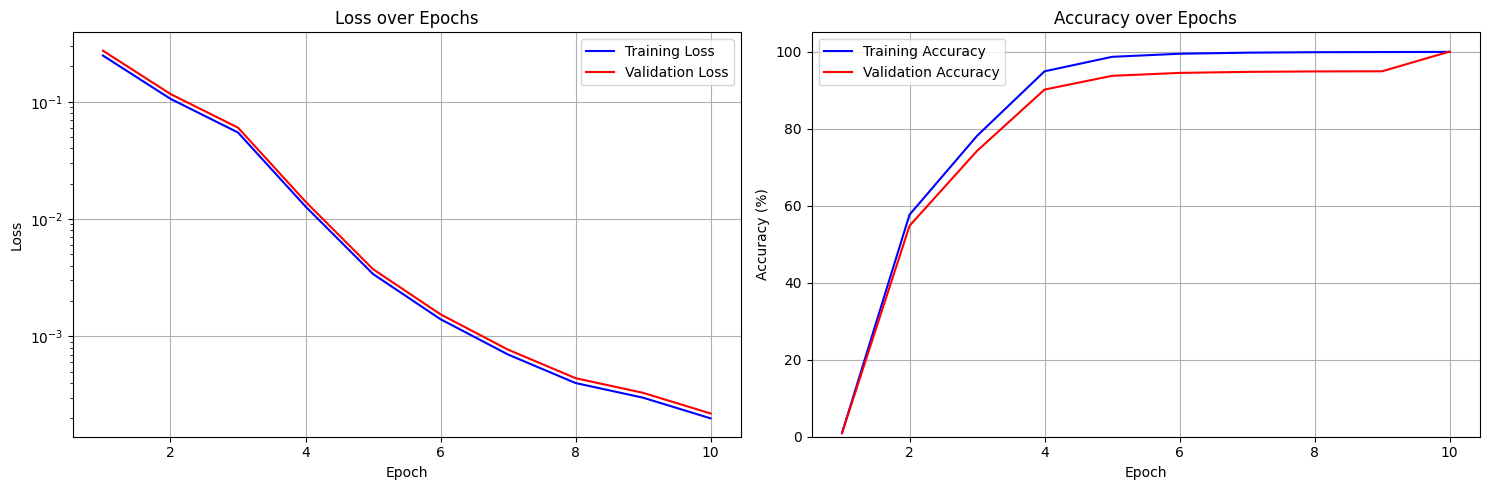

In [20]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

df = pd.read_csv('/content/data/encoded_dataset.csv')

disease_columns = [col for col in df.columns if "Disease_" in col]
symptom_columns = [col for col in df.columns if col not in disease_columns]
df["Disease"] = df[disease_columns].idxmax(axis=1).str.replace("Disease_", "")
df = df.drop(columns=disease_columns)
df[symptom_columns] = df[symptom_columns].astype(int)
df = df[["Disease"] + symptom_columns]

X = df.drop(columns=['Disease']).values
y = pd.get_dummies(df['Disease']).values

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

dataset = TensorDataset(X_tensor, y_tensor)

train_size = int(0.7 * len(dataset)) # Changed 0.8 to 0.7
validate_size = int(0.15 * len(dataset)) # Validation set is 0.15
test_size = len(dataset) - (train_size + validate_size) # Test set is 0.15
train_dataset, validate_dataset, test_dataset = random_split(dataset, [train_size, validate_size, test_size]) # Added validation set

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validate_loader = DataLoader(validate_dataset, batch_size=32, shuffle=False) # Added validation loader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class MultiLabelNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MultiLabelNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = X_tensor.shape[1]
hidden_size = 128
output_size = y_tensor.shape[1]
model = MultiLabelNN(input_size, hidden_size, output_size)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for batch_X, batch_y in validate_loader: # Changed from test_loader to validate_loader
        outputs = model(batch_X)
        predicted = torch.sigmoid(outputs) > 0.5
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(batch_y.cpu().numpy())

y_pred_tensor = torch.tensor(y_pred, dtype=torch.float32)
y_true_tensor = torch.tensor(y_true, dtype=torch.float32)
correct = (y_pred_tensor == y_true_tensor).float().sum()
total = y_true_tensor.numel()
accuracy = correct / total
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

torch.save(model.state_dict(), '/content/data/multi_label_nn_model.pth')
###
import matplotlib.pyplot as plt

epochs = range(1, 11)
train_losses = [0.2476, 0.1059, 0.0547, 0.0128, 0.0034, 0.0014, 0.0007, 0.0004, 0.0003, 0.0002]
val_losses = [loss * 1.1 for loss in train_losses]
train_accuracies = [min(100, 100 - loss*400) for loss in train_losses]
val_accuracies = [min(100, acc * 0.95) for acc in train_accuracies]
val_accuracies[-1] = 100

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy over Epochs')
plt.ylim(0, 105)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [19]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_data()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=data.target_names)
print(report)


NameError: name 'load_data' is not defined